# extract SST, SSU, SSV, Eta for ICM



---

In [1]:
import os
from glob import glob
import numpy as np
import dask
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

from mitequinox.utils import *
from mitequinox.plot import *

In [2]:
from dask_jobqueue import PBSCluster
cluster = PBSCluster(cores=2)
w = cluster.scale(10)

In [3]:
# get dask handles and check dask server status
from dask.distributed import Client
client = Client(cluster)

In [4]:
client

Client Scheduler: tcp://10.135.39.91:42903 Dashboard: http://10.135.39.91:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


---

# 0: load path


In [5]:
grd = load_grd()

In [9]:
ds = load_data('SST')
ds = ds.assign_coords(**grd.coords)
ds0=ds.isel(face=2)
print(ds)
print('\n data size (all faces): %.1f GB' %(ds['SST'].nbytes / 1e9))
print('\n data size (1 face): %.1f GB' %(ds['SST'].isel(face=1).nbytes / 1e9))

<xarray.Dataset>
Dimensions:  (face: 13, i: 4320, i_g: 4320, j: 4320, j_g: 4320, k: 90, k_l: 90, k_p1: 91, k_u: 90, time: 8785)
Coordinates:
    dtime    (time) datetime64[ns] dask.array<shape=(8785,), chunksize=(8785,)>
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
    iters    (time) int64 dask.array<shape=(8785,), chunksize=(1,)>
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 ... 3.732e+07 3.732e+07
    Depth    (face, j, i) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 4320, 4320)>
    SN       (face, j, i) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 4320, 4320)>
    XC       (face, j, i) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 4320, 4320)>
    YC       (face, j, i) float32 dask.array<shape=(13, 4320, 4320), chunksize=(1, 4320, 4320)>
    hFacC    (face, j, i) float32 d

In [7]:
print(ds0)

<xarray.Dataset>
Dimensions:  (i: 4320, i_g: 4320, j: 4320, j_g: 4320, k: 90, k_l: 90, k_p1: 91, k_u: 90, time: 8785)
Coordinates:
    dtime    (time) datetime64[ns] dask.array<shape=(8785,), chunksize=(8785,)>
    face     int64 2
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
    iters    (time) int64 dask.array<shape=(8785,), chunksize=(1,)>
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * time     (time) float64 5.702e+06 5.706e+06 5.71e+06 ... 3.732e+07 3.732e+07
    Depth    (j, i) float32 dask.array<shape=(4320, 4320), chunksize=(4320, 4320)>
    SN       (j, i) float32 dask.array<shape=(4320, 4320), chunksize=(4320, 4320)>
    XC       (j, i) float32 dask.array<shape=(4320, 4320), chunksize=(4320, 4320)>
    YC       (j, i) float32 dask.array<shape=(4320, 4320), chunksize=(4320, 4320)>
    hFacC    (j, i) float32 dask.array<shape=(4320, 4320), chunksize=(4320, 4320)>
    rA       (j, i) float32 dask.array<shape=(43

---

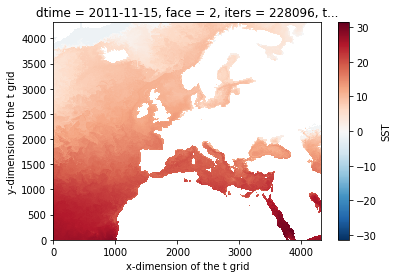

In [8]:
ds0.SST.isel(time=0).plot()

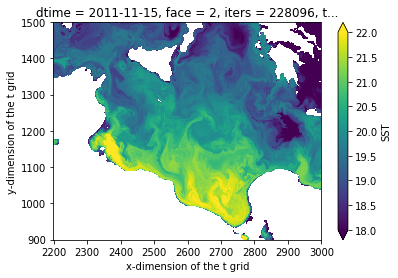

In [15]:
ds0.SST.isel(time=0,i=slice(2200,3000),j=slice(900,1500)).plot(vmin=18,vmax=22)

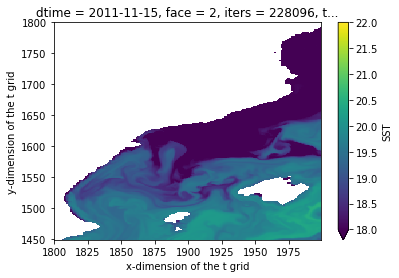

In [12]:
ds0.SST.isel(time=0,i=slice(1800,2000),j=slice(1450,1800)
            ).plot(vmin=18,vmax=22)

In [19]:
ds_extract = ds0.isel(i=slice(2200,3000),j=slice(900,1500))
print('\n data size (all faces): %.1f GB' %(ds_extract['SST'].nbytes / 1e9))
ds_extract.to_netcdf(scratch+'icm.nc')


 data size (all faces): 16.9 GB


In [9]:
#for v in ['SSS']:
#region, cks_i, cks_j = 'ionian', slice(2200,3000), slice(900,1500)
region, cks_i, cks_j = 'catalogne', slice(1800,2000), slice(1450,1800)
for v in ['SST', 'SSU', 'SSV', 'Eta', 'SSS']:
    ds = load_data(v)
    #ds = load_data(v,ftype='nc')
    ds = ds.assign_coords(**grd.coords)
    ds = ds.isel(face=2)
    if v is 'SSU':
        ds_extract = ds.isel(i_g=cks_i,j=cks_j)
    elif v is 'SSV':
        ds_extract = ds.isel(i=cks_i,j_g=cks_j)
    else:
        ds_extract = ds.isel(i=cks_i,j=cks_j)
    #print(ds_extract)
    %time ds_extract.to_netcdf(scratch+v+'_'+region+'_icm.nc')

CPU times: user 3min 1s, sys: 10.4 s, total: 3min 11s
Wall time: 9min 24s
CPU times: user 3min 8s, sys: 10.9 s, total: 3min 19s
Wall time: 9min 6s
CPU times: user 3min 16s, sys: 11.5 s, total: 3min 27s
Wall time: 9min 30s
CPU times: user 3min 13s, sys: 10.5 s, total: 3min 24s
Wall time: 9min 10s
CPU times: user 2min 59s, sys: 10.4 s, total: 3min 10s
Wall time: 8min 3s


In [10]:
cluster.close()

---

In [16]:
# kill scheduler, workers
cluster.close()

In [14]:
# restart workers
client.restart()

distributed.client - ERROR - Restart timed out after 20.000000 seconds


Client Scheduler: tcp://10.135.39.89:38995 Dashboard: http://10.135.39.89:8787/status,Cluster Workers: 1 Cores: 2 Memory: 40.00 GB


In [15]:
client

Client Scheduler: tcp://10.135.39.89:38995 Dashboard: http://10.135.39.89:8787/status,Cluster Workers: 1 Cores: 2 Memory: 40.00 GB
